<a href="https://colab.research.google.com/github/pony-yyy/GroupWork/blob/main/Restaurant_in_LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [53]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [54]:
# Query all data from the table
query = f"""
  SELECT
  b.business_id,
  t.text AS review
FROM
  `{project_id}.{dataset_name}.All_data_cleaned` b
INNER JOIN
  `{project_id}.{dataset_name}.restaurant_tips` t
ON
  b.business_id = t.business_id
WHERE
  b.state = 'LA';

"""

query_job = bigquery_client.query(query)
results = query_job.result()

reviewInPa_df = query_job.to_dataframe()
reviewInPa_df

,business_id,review
0,clwjLY7PdYJpe7IP9lrqEw,Order the Tortilla Soup
1,clwjLY7PdYJpe7IP9lrqEw,They have a really good shrimp app!
2,clwjLY7PdYJpe7IP9lrqEw,This place is busy! Great drinks and food!
3,clwjLY7PdYJpe7IP9lrqEw,"Quick, great service, excellent food, strong d..."
4,clwjLY7PdYJpe7IP9lrqEw,Would help if the server was more fluent in En...
...,...,...
77348,gLaxSkjWzt25hybkaKwQcA,Am I the only one who is disgusted by how dirt...
77349,HDnaNdHEZpQMYXo-ZHHG9g,After 40 years of frequenting what used to be ...
77350,03sqfUjXdEtZCUxVFxXntQ,Great food... The service is awful and they ar...
77351,OT3wgKIbYzQywdFZCoubPw,This place is disgusting. And expensive. And a...


In [55]:
import pandas as pd
from textblob import TextBlob
import numpy as np

target_column = 'review'

reviewInPa_df['Polarity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
reviewInPa_df['Subjectivity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.subjectivity)

reviewInPa_df['Sentiment'] = np.where(reviewInPa_df['Polarity'] > 0, 'Positive', np.where(reviewInPa_df['Polarity'] < 0, 'Negative', 'Neutral'))

reviewInPa_df

,business_id,review,Polarity,Subjectivity,Sentiment
0,clwjLY7PdYJpe7IP9lrqEw,Order the Tortilla Soup,0.000000,0.000000,Neutral
1,clwjLY7PdYJpe7IP9lrqEw,They have a really good shrimp app!,0.875000,0.600000,Positive
2,clwjLY7PdYJpe7IP9lrqEw,This place is busy! Great drinks and food!,0.562500,0.525000,Positive
3,clwjLY7PdYJpe7IP9lrqEw,"Quick, great service, excellent food, strong d...",0.641667,0.745833,Positive
4,clwjLY7PdYJpe7IP9lrqEw,Would help if the server was more fluent in En...,0.250000,0.250000,Positive
...,...,...,...,...,...
77348,gLaxSkjWzt25hybkaKwQcA,Am I the only one who is disgusted by how dirt...,-0.533333,0.933333,Negative
77349,HDnaNdHEZpQMYXo-ZHHG9g,After 40 years of frequenting what used to be ...,0.042762,0.468485,Positive
77350,03sqfUjXdEtZCUxVFxXntQ,Great food... The service is awful and they ar...,-0.180990,0.491667,Negative
77351,OT3wgKIbYzQywdFZCoubPw,This place is disgusting. And expensive. And a...,-0.750000,0.850000,Negative


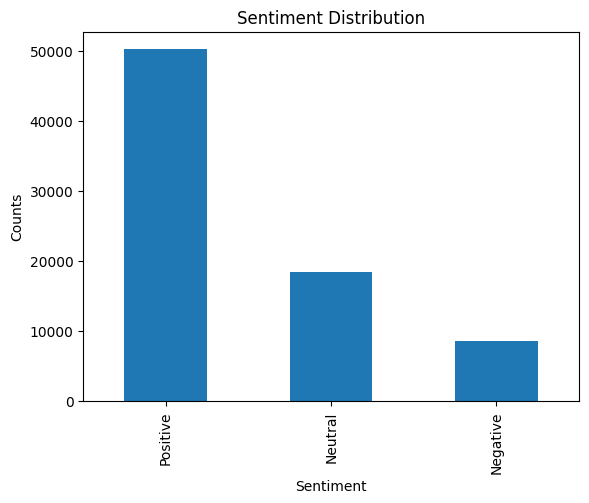

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = reviewInPa_df['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [57]:
positive_reviews = reviewInPa_df[reviewInPa_df['Sentiment'] == 'Positive']

positive_review_counts = positive_reviews.groupby('business_id').size()

top_10_positive_businesses = positive_review_counts.sort_values(ascending=False).head(10)

print(top_10_positive_businesses)

business_id
FEXhWNCMkv22qG04E83Qjg    1513
_ab50qdWOk0DdB6XOrBitw     601
ac1AeYqs8Z4_e2X5M3if2A     476
GBTPC53ZrG1ZBY3DT8Mbcw     436
iSRTaT9WngzB8JJ2YKJUig     384
oBNrLz4EDhiscSlbOl8uAw     381
VQcCL9PiNL_wkGf-uF3fjg     358
gTC8IQ_i8zXytWSly3Ttvg     353
VaO-VW3e1kARkU9bP1E7Fw     293
6a4gLLFSgr-Q6CZXDLzBGQ     285
dtype: int64


In [58]:
top_10_positive_businesses_df = top_10_positive_businesses.reset_index()
top_10_positive_businesses_df.columns = ['business_id', 'positive_review_count']

print(top_10_positive_businesses_df)

              business_id  positive_review_count
0  FEXhWNCMkv22qG04E83Qjg                   1513
1  _ab50qdWOk0DdB6XOrBitw                    601
2  ac1AeYqs8Z4_e2X5M3if2A                    476
3  GBTPC53ZrG1ZBY3DT8Mbcw                    436
4  iSRTaT9WngzB8JJ2YKJUig                    384
5  oBNrLz4EDhiscSlbOl8uAw                    381
6  VQcCL9PiNL_wkGf-uF3fjg                    358
7  gTC8IQ_i8zXytWSly3Ttvg                    353
8  VaO-VW3e1kARkU9bP1E7Fw                    293
9  6a4gLLFSgr-Q6CZXDLzBGQ                    285


In [59]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

# Query all data from the table
query = f"""
   SELECT business_id,categories
   FROM `{project_id}.{dataset_name}.{table_name}`;

"""

query_job = bigquery_client.query(query)
results = query_job.result()

categories_df = query_job.to_dataframe()
categories_df

,business_id,categories
0,kfNv-JZpuN6TVNSO6hHdkw,"Steakhouses, Asian Fusion, Restaurants"
1,sqSqqLy0sN8n2IZrAbzidQ,"Pizza, Chicken Wings, Sandwiches, Restaurants"
2,RK6-cJ9hj53RzOlCBmpT-g,"Restaurants, Italian, Food Trucks, Food"
3,EuRGgOwJ0g1vTj2R04j37Q,"Seafood, Restaurants"
4,pmuuoDqNZp7518AUd-YmPA,"Restaurants, Bakeries, Caterers, Bagels, Food,..."
...,...,...
52281,xThXwInJdMTI2yhgY3Uwyw,"Restaurants, Mexican"
52282,QKB21Alitgj-m6oEoFZFBw,"Restaurants, Mexican"
52283,4D19uG4enigRAsvTVmn61g,"Restaurants, Mexican"
52284,HUJLxKMVmUvreA-07qUitg,"Restaurants, Mexican"


In [60]:
categories_in_top_10_businesses = pd.merge(top_10_positive_businesses_df, categories_df, on='business_id', how='inner')
categories_in_top_10_businesses

,business_id,positive_review_count,categories
0,FEXhWNCMkv22qG04E83Qjg,1513,"Flowers & Gifts, Gift Shops, Cafes, Restaurant..."
1,_ab50qdWOk0DdB6XOrBitw,601,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole"
2,ac1AeYqs8Z4_e2X5M3if2A,476,"Restaurants, Seafood, Cajun/Creole, Breakfast ..."
3,GBTPC53ZrG1ZBY3DT8Mbcw,436,"German, Restaurants, Seafood, Cocktail Bars, F..."
4,iSRTaT9WngzB8JJ2YKJUig,384,"Cajun/Creole, Restaurants, Event Planning & Se..."
5,oBNrLz4EDhiscSlbOl8uAw,381,"Restaurants, American (Traditional), American ..."
6,VQcCL9PiNL_wkGf-uF3fjg,358,"American (New), Restaurants, Sandwiches, Seafo..."
7,gTC8IQ_i8zXytWSly3Ttvg,353,"Shopping, Butcher, Restaurants, Sandwiches, Fo..."
8,VaO-VW3e1kARkU9bP1E7Fw,293,"Restaurants, Sandwiches, Seafood, Cajun/Creole"
9,6a4gLLFSgr-Q6CZXDLzBGQ,285,"Cajun/Creole, Seafood, Restaurants"


In [61]:
pip install wordcloud

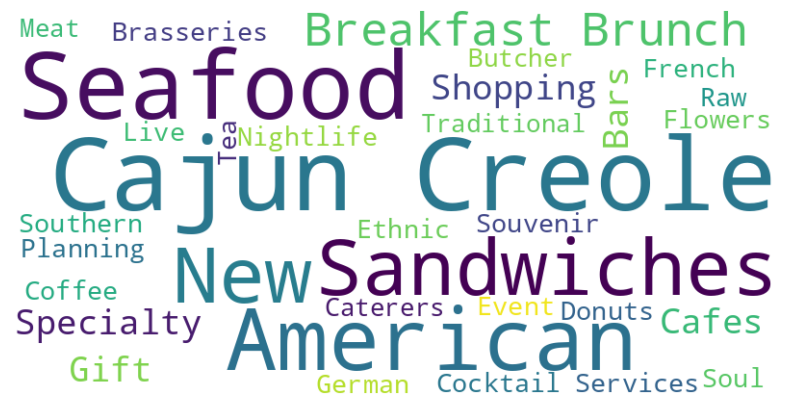

In [62]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(category for category in categories_in_top_10_businesses['categories'])

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Restaurants', 'Food', 'Restaurant',"&","Markets","Shops"])


cleaned_words = [word for word in text.split() if word not in custom_stopwords]

word_counts = Counter(cleaned_words)

sorted_words = word_counts.most_common()

# for word, count in sorted_words:
#     print(f"{word}: {count}")

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
